In [1]:
!pip install pymongo
import pymongo
from pymongo import MongoClient
import pandas as pd

In [2]:
client = MongoClient('localhost', 27017)

In [3]:
 client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [4]:
db = client.herpdata

In [5]:
collection = db.SnakeTab1e

In [6]:
Club_Members = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - SnakeTab1e.csv')
Club_Members

,member_ID,member_fname,member_lname,exec_id,faction_id,favrep_id,year_joined,semester_hours
0,1,Alejandro,Capecchi,6,4,3,2019,20
1,2,Alex,Chung,6,2,10,2020,4
2,3,Bejoy,Sen,6,4,9,2021,2
3,4,Ethan,Steere,6,3,10,2020,1
4,5,Franky,Padilla Coo,6,3,4,2019,15
5,6,Himayatullah,Azizi,6,2,4,2021,17
6,7,Jake,Antmann,1,1,10,2020,14
7,8,Jayanth,Peetla,6,2,2,2020,13
8,9,Ji,Chen,6,2,3,2019,22
9,10,John,Le,6,3,7,2020,3


In [7]:
club_members_dict = Club_Members.to_dict('records')
club_members_dict

[{'member_ID': 1,
  'member_fname': 'Alejandro ',
  'member_lname': 'Capecchi',
  'exec_id': 6,
  'faction_id': 4,
  'favrep_id': 3,
  'year_joined': 2019,
  'semester_hours': 20},
 {'member_ID': 2,
  'member_fname': 'Alex ',
  'member_lname': 'Chung',
  'exec_id': 6,
  'faction_id': 2,
  'favrep_id': 10,
  'year_joined': 2020,
  'semester_hours': 4},
 {'member_ID': 3,
  'member_fname': 'Bejoy',
  'member_lname': 'Sen',
  'exec_id': 6,
  'faction_id': 4,
  'favrep_id': 9,
  'year_joined': 2021,
  'semester_hours': 2},
 {'member_ID': 4,
  'member_fname': 'Ethan ',
  'member_lname': 'Steere',
  'exec_id': 6,
  'faction_id': 3,
  'favrep_id': 10,
  'year_joined': 2020,
  'semester_hours': 1},
 {'member_ID': 5,
  'member_fname': 'Franky',
  'member_lname': 'Padilla Coo',
  'exec_id': 6,
  'faction_id': 3,
  'favrep_id': 4,
  'year_joined': 2019,
  'semester_hours': 15},
 {'member_ID': 6,
  'member_fname': 'Himayatullah',
  'member_lname': 'Azizi',
  'exec_id': 6,
  'faction_id': 2,
  'favr

In [8]:
factions = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - SnakeTableTres.csv')
factions

,faction_id,species,mascot_name,Color
0,1,T-Rex,Ted,green
1,2,Dragon,Daisy,blue
2,3,Basilisk,Brittney,red
3,4,Frog,Kermit,yellow


In [9]:
roles = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - SnakeTableDos.csv')
roles

,exec_id,position,elected
0,1,president,Spring
1,2,secretary,Fall
2,3,treasurer,Spring
3,4,vice president,Summer
4,5,outreach head,Fall
5,6,member,Fall


In [10]:
favrep = pd.read_csv('/Users/jantmann17/Downloads/Snakesheet - Sn4ke.csv')
favrep

,favrep_id,reptile,lifespan_years,diet,conservation_status
0,1,komodo dragon,30,carnivore,endangered
1,2,american alligator,40,carnivore,least concern
2,3,leatherback sea turtle,50,gelatinivore,vulnerable
3,4,tokay gecko,15,omnivore,endangered
4,5,bearded dragon,10,omnivore,least concern
5,6,gopher tortoise,90,herbivore,vulnerable
6,7,chameleon,6,omnivore,threatened
7,8,iguana,14,herbivore,threatened
8,9,anaconda,10,carnivore,least concern
9,10,poison dart frog,12,omnivore,threatened


In [11]:
for i in range(len(club_members_dict)):
    faction_id = club_members_dict[i]['faction_id']
    faction_info = factions[factions['faction_id'] == faction_id][['species','mascot_name','Color']].to_dict('records')[0]
    club_members_dict[i]['faction_id'] = faction_info
    roles_id = club_members_dict[i]['exec_id']
    roles_info = roles[roles['exec_id'] == roles_id][['position', 'elected']].to_dict('records')[0]
    club_members_dict[i]['exec_id'] = roles_info
    favrep_id = club_members_dict[i]['favrep_id']
    favrep_info = favrep[favrep['favrep_id'] == favrep_id][['reptile', 'lifespan_years', 'diet', 'conservation_status']].to_dict('records')[0]
    club_members_dict[i]['favrep_id'] = favrep_info

In [12]:
club_members_dict

[{'member_ID': 1,
  'member_fname': 'Alejandro ',
  'member_lname': 'Capecchi',
  'exec_id': {'position': 'member', 'elected': 'Fall'},
  'faction_id': {'species': 'Frog',
   'mascot_name': 'Kermit',
   'Color': 'yellow'},
  'favrep_id': {'reptile': 'leatherback sea turtle',
   'lifespan_years': 50,
   'diet': 'gelatinivore',
   'conservation_status': 'vulnerable'},
  'year_joined': 2019,
  'semester_hours': 20},
 {'member_ID': 2,
  'member_fname': 'Alex ',
  'member_lname': 'Chung',
  'exec_id': {'position': 'member', 'elected': 'Fall'},
  'faction_id': {'species': 'Dragon', 'mascot_name': 'Daisy', 'Color': 'blue'},
  'favrep_id': {'reptile': 'poison dart frog',
   'lifespan_years': 12,
   'diet': 'omnivore',
   'conservation_status': 'threatened'},
  'year_joined': 2020,
  'semester_hours': 4},
 {'member_ID': 3,
  'member_fname': 'Bejoy',
  'member_lname': 'Sen',
  'exec_id': {'position': 'member', 'elected': 'Fall'},
  'faction_id': {'species': 'Frog',
   'mascot_name': 'Kermit',
  

In [13]:
import pymongo
from pymongo import MongoClient

In [14]:
client = MongoClient('localhost', 27017)

In [15]:
db = client.herpdata

In [16]:
collection = db.SnakeTab1e

In [17]:
club_members_dict

[{'member_ID': 1,
  'member_fname': 'Alejandro ',
  'member_lname': 'Capecchi',
  'exec_id': {'position': 'member', 'elected': 'Fall'},
  'faction_id': {'species': 'Frog',
   'mascot_name': 'Kermit',
   'Color': 'yellow'},
  'favrep_id': {'reptile': 'leatherback sea turtle',
   'lifespan_years': 50,
   'diet': 'gelatinivore',
   'conservation_status': 'vulnerable'},
  'year_joined': 2019,
  'semester_hours': 20},
 {'member_ID': 2,
  'member_fname': 'Alex ',
  'member_lname': 'Chung',
  'exec_id': {'position': 'member', 'elected': 'Fall'},
  'faction_id': {'species': 'Dragon', 'mascot_name': 'Daisy', 'Color': 'blue'},
  'favrep_id': {'reptile': 'poison dart frog',
   'lifespan_years': 12,
   'diet': 'omnivore',
   'conservation_status': 'threatened'},
  'year_joined': 2020,
  'semester_hours': 4},
 {'member_ID': 3,
  'member_fname': 'Bejoy',
  'member_lname': 'Sen',
  'exec_id': {'position': 'member', 'elected': 'Fall'},
  'faction_id': {'species': 'Frog',
   'mascot_name': 'Kermit',
  

In [18]:
collection.delete_many({})

In [19]:
collection.insert_many(club_members_dict)

In [20]:
x = collection.find({'faction_id.species' : 'Dragon', 'favrep_id.reptile' : 'komodo dragon'})

In [21]:
# NO one in the Dragon faction's favorite reptile was the komodo dragon... what a scandal
# did it for Basilisk in Mongo, only person in Basilisk faction that liked a type of lizard was Franky so congrats
# did it for Frog and no one's favorite reptile was frog either
# did it for T-Rex and the only person in it that liked what we said was closest to a T-Rex was Joon who liked the alligator

In [46]:
y = collection.aggregate([{"$group" :{"_id":"$year_joined", "totalhours" : {"$sum" : "$semester_hours"}}} , {"$sort": {"year_joined": 1}}])

In [47]:
for x in y:
    print(x)

{'_id': 2019, 'totalhours': 124}
{'_id': 2020, 'totalhours': 143}
{'_id': 2021, 'totalhours': 36}
{'_id': 2022, 'totalhours': 28}


In [51]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

<bound method Figure.show of <Figure size 864x360 with 1 Axes>>

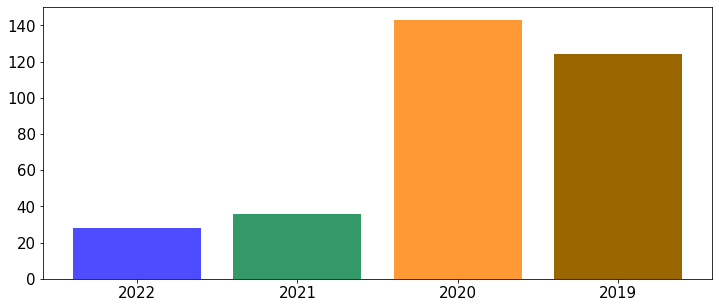

In [53]:
plt.rcParams.update({'font.size':15, 'font.family': 'DejaVu Sans'})
y = np.array([28, 36, 143, 124])
x = np.array(["2022", "2021", "2020", "2019"])
mycolors = ["#4d4dff", "#339966", "#ff9933", "#996600"]
fig, axs = plt.subplots(figsize=(12,5))
axs.bar(x,y, color = mycolors,)
fig.savefig('yearsbar.png', dpi = 120)
fig.show